In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import json

from sklearn.preprocessing import LabelEncoder


import seaborn as sn
#from pylab import rcParams      
#rcParams['figure.figsize'] = 8, 8
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("ggplot")
%matplotlib inline

In [2]:
from sklearn.model_selection import StratifiedKFold, train_test_split, RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

###  Часть 1. Описание набора данных и признаков

In [3]:
f_name=['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence', 'negativereason', 'negativereason_confidence', 'airline','airline_sentiment_gold','name','negativereason_gold','retweet_count','text','tweet_coord','tweet_created','tweet_location','user_timezone']

In [4]:
memes = pd.read_csv('Tweets.csv') #, index_col="id")

In [5]:
memes.drop(columns="airline", axis=1)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
5,570300767074181121,negative,1.0000,Can't Tell,0.6842,NaN,jnardino,NaN,0,@VirginAmerica seriously would pay $30 a fligh...,NaN,2015-02-24 11:14:33 -0800,NaN,Pacific Time (US & Canada)
6,570300616901320704,positive,0.6745,NaN,0.0000,NaN,cjmcginnis,NaN,0,"@VirginAmerica yes, nearly every time I fly VX...",NaN,2015-02-24 11:13:57 -0800,San Francisco CA,Pacific Time (US & Canada)
7,570300248553349120,neutral,0.6340,NaN,NaN,NaN,pilot,NaN,0,@VirginAmerica Really missed a prime opportuni...,NaN,2015-02-24 11:12:29 -0800,Los Angeles,Pacific Time (US & Canada)
8,570299953286942721,positive,0.6559,NaN,NaN,NaN,dhepburn,NaN,0,"@virginamerica Well, I didn't…but NOW I DO! :-D",NaN,2015-02-24 11:11:19 -0800,San Diego,Pacific Time (US & Canada)
9,570295459631263746,positive,1.0000,NaN,NaN,NaN,YupitsTate,NaN,0,"@VirginAmerica it was amazing, and arrived an ...",NaN,2015-02-24 10:53:27 -0800,Los Angeles,Eastern Time (US & Canada)


In [6]:
memes.shape

(14640, 15)

In [7]:
memes.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [8]:
memes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
tweet_id                        14640 non-null int64
airline_sentiment               14640 non-null object
airline_sentiment_confidence    14640 non-null float64
negativereason                  9178 non-null object
negativereason_confidence       10522 non-null float64
airline                         14640 non-null object
airline_sentiment_gold          40 non-null object
name                            14640 non-null object
negativereason_gold             32 non-null object
retweet_count                   14640 non-null int64
text                            14640 non-null object
tweet_coord                     1019 non-null object
tweet_created                   14640 non-null object
tweet_location                  9907 non-null object
user_timezone                   9820 non-null object
dtypes: float64(2), int64(2), object(11)
memory usage: 1.7+ MB


In [9]:
memes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
tweet_id                        14640 non-null int64
airline_sentiment               14640 non-null object
airline_sentiment_confidence    14640 non-null float64
negativereason                  9178 non-null object
negativereason_confidence       10522 non-null float64
airline                         14640 non-null object
airline_sentiment_gold          40 non-null object
name                            14640 non-null object
negativereason_gold             32 non-null object
retweet_count                   14640 non-null int64
text                            14640 non-null object
tweet_coord                     1019 non-null object
tweet_created                   14640 non-null object
tweet_location                  9907 non-null object
user_timezone                   9820 non-null object
dtypes: float64(2), int64(2), object(11)
memory usage: 1.7+ MB


In [10]:
memes.tail(3)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada)
14639,569587140490866689,neutral,0.6771,NaN,0.0000,American,NaN,daviddtwu,NaN,0,@AmericanAir we have 8 ppl so we need 2 know h...,NaN,2015-02-22 11:58:51 -0800,"dallas, TX",NaN


In [11]:
memes= memes.dropna(axis='index', how='any', subset=['tweet_created'])


In [12]:
memes = memes[pd.notnull(memes['tweet_created'])] 

In [13]:
memes['tweet_created']=pd.to_datetime(memes['tweet_created'])

# Время добавления

Так как в нашем распоряжении есть чудесная переменная `added`, то можно поиграться с ней, преобразовав в понятный питону формат и повытаскивая из него час, день недели и месяца, месяц и год добавления

In [14]:
memes['Timestamp'] = pd.to_datetime(memes['tweet_created'])

In [15]:
memes['Year'] = memes.Timestamp.apply(lambda x: x.year)
memes['Month'] = memes.Timestamp.apply(lambda x: x.month)
memes['Day'] = memes.Timestamp.apply(lambda x: x.day)
memes['Hour'] = memes.Timestamp.apply(lambda x: x.hour)
memes['Weekday'] = memes.Timestamp.apply(lambda x: x.weekday())

In [16]:
memes.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,...,tweet_coord,tweet_created,tweet_location,user_timezone,Timestamp,Year,Month,Day,Hour,Weekday
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,...,NaN,2015-02-24 11:35:52-08:00,NaN,Eastern Time (US & Canada),2015-02-24 11:35:52-08:00,2015,2,24,11,1
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,...,NaN,2015-02-24 11:15:59-08:00,NaN,Pacific Time (US & Canada),2015-02-24 11:15:59-08:00,2015,2,24,11,1
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,...,NaN,2015-02-24 11:15:48-08:00,Lets Play,Central Time (US & Canada),2015-02-24 11:15:48-08:00,2015,2,24,11,1
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,...,NaN,2015-02-24 11:15:36-08:00,NaN,Pacific Time (US & Canada),2015-02-24 11:15:36-08:00,2015,2,24,11,1
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,...,NaN,2015-02-24 11:14:45-08:00,NaN,Pacific Time (US & Canada),2015-02-24 11:14:45-08:00,2015,2,24,11,1


Также пригодится переменная, отвечающая за число дней, прошедших с момента добавления мема на сайт

In [17]:
memes['airline'] = (memes.Timestamp.max() - memes.Timestamp)/np.timedelta64(1, 'D')

А теперь для наших созданных переменных построим несколько гистограмм

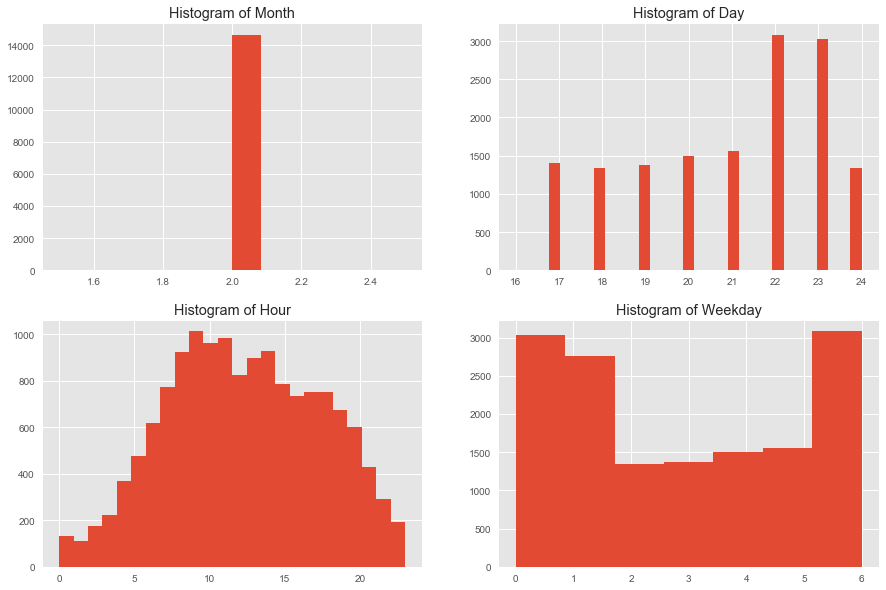

In [18]:
index =0 
f, axarr = plt.subplots(2, 2, figsize=(15,10))
times = ['Month', 'Day', 'Hour', 'Weekday']
bins = [12, 31, 24, 7]
index = 0
for i in range(2):
    for j in range(2):
        axarr[i, j].hist(memes[times[index]], bins = bins[index])
        axarr[i, j].set_title('Histogram of {}'.format(times[index]))
        index += 1

f.subplots_adjust(hspace=0.2)

Итак, что тут есть интересного:
- День ничего необычного не принес, распределено достаточно равномерно
- Гистограмма часа достаточно показательная - в ночной период активность значительно снижается, а затем растет, достигая пика примерно после окончания уроков у основной аудитории
- По дням недели есть заметное снижения на выходных, интересно, почему бы это

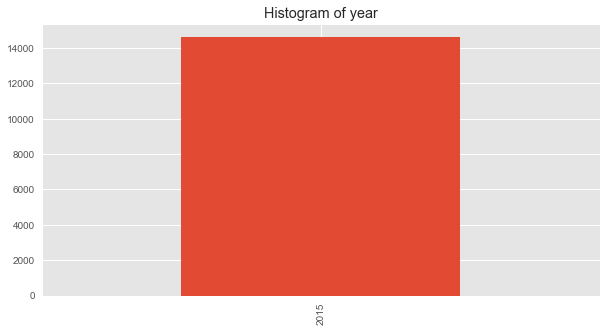

In [19]:
memes.Year.value_counts().plot(kind='bar', figsize=(10, 5))
plt.title("Histogram of year")
plt.show()

In [20]:
memes.Year.value_counts(normalize=True).apply(lambda x: "{:.2f}%".format(x*100))

2015    100.00%
Name: Year, dtype: object

In [21]:
plt.hist(memes.target)
#plt.title("Hist of log average views");

AttributeError: 'DataFrame' object has no attribute 'target'

# ML

In [ ]:
import nltk
from nltk.corpus import stopwords

In [ ]:
stop = stopwords.words('english')
stemmer = nltk.stem.snowball.EnglishStemmer('english')

def data_Stemmer(text):
    return ' '.join([stemmer.stem(word) for word in text.split(' ') if word not in stop])

In [ ]:
#memes["description"] = memes.tags.fillna("")+' '+\
                       memes.about.fillna("")+' '+\
                       memes.origin.fillna("")+' '+\
                       memes.other_text.fillna("")

In [ ]:
memes.description = memes.description.apply(lambda x: x.lower().replace('unknown', ''))

In [ ]:
memes.description[4]

In [ ]:
data_Stemmer(memes.description[4])

In [ ]:
memes.description = memes.description.apply(lambda x: data_Stemmer(x))

In [ ]:
X = memes.description
y = memes.target

Для TF-IDF попробуем использовать биграммы, а чтобы словарь не раздувался до неадекватных размеров, ограничим минимальную частоты содержания слов в документах 0.1%. То есть будем выкидывать такие слова и биграммы, которые встречаются реже, чем в 0.1% документов. 

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf_vectorizer = TfidfVectorizer(stop_words=stop, ngram_range=(1, 2), min_df=0.001, norm=None)

In [ ]:
Xtr, Xval, ytr, yval = train_test_split(X, y, test_size=0.30, random_state=42)

In [ ]:
Xtr_tfidf = tf_vectorizer.fit_transform(Xtr)
Xval_tfidf = tf_vectorizer.transform(Xval)
Xtr_tfidf.shape, Xval_tfidf.shape

Целевую переменную (среднее число просмотров в день), разделим на пять групп по квантилям, одновременно получая наивный baseline - если мы всем объектам примишем один класс, то итоговая точность составит 1/5 = 20%. Еще один плюс подхода - дисбаланса классов у нас точно не будет :)

In [ ]:
#ytr_quantile = pd.qcut(ytr, q=5)

In [ ]:
#ytr_quantile.value_counts()

Для будущих нужд запомним имеющиеся интервалы

In [ ]:
#intervals = ytr_quantile.unique().categories.get_values()

In [ ]:
#intervals

Так как на тестовой выборке мы аналогичное преобразование с квантильным разбиением выполнить не можем (группы не будут совпадать), запишем функцию для преобразования тестовых значений 

In [ ]:
"""
def quantile(y):
    for interval in intervals:
        if y<=interval.right:
            return interval
            break
    return interval
    """

In [ ]:
#yval_quantile = yval.apply(quantile)

In [ ]:
#yval_quantile.value_counts()

Наконец, для обучения закодируем интервалы при помощи `LabelEncoder()`

In [ ]:
#le = LabelEncoder()

In [ ]:
#ytr_quantile = le.fit_transform(ytr_quantile)
#yval_quantile = le.transform(yval_quantile)

In [ ]:
#ytr_quantile

In [ ]:
#le.inverse_transform(ytr_quantile)

In [ ]:
from sklearn.linear_model import SGDClassifier, LogisticRegressionCV

In [ ]:
logit_sgd = SGDClassifier(
    loss='log', 
    shuffle=True, 
    n_iter_no_change=10, 
    max_iter=500, 
    penalty='l2', 
    random_state=42
)

In [ ]:
logit_sgd.fit(Xtr_tfidf, ytr)

print(accuracy_score(logit_sgd.predict(Xtr_tfidf), ytr))
print(accuracy_score(logit_sgd.predict(Xval_tfidf), yval))

print(classification_report(logit_sgd.predict(Xval_tfidf), yval))

In [ ]:
logit_cv = LogisticRegressionCV(Cs=10, n_jobs=-1)
logit_cv.fit(Xtr_tfidf, ytr)

In [ ]:
print(accuracy_score(logit_cv.predict(Xtr_tfidf), ytr))
print(accuracy_score(logit_cv.predict(Xval_tfidf), yval))

print(classification_report(logit_cv.predict(Xval_tfidf), yval))

In [ ]:
def visualize_coefficients(coef, feature_names, title, plot_num, n_top_features=10):
    interesting_coefficients = np.argsort(coef)[-n_top_features:]
    
    plt.figure(figsize=(15, 15))
    plt.subplot(510+plot_num+1)
    colors = ["lightblue" for c in coef[interesting_coefficients]]
    plt.bar(np.arange(n_top_features), coef[interesting_coefficients], color=colors)
    feature_names = np.array(feature_names)
    plt.xticks(np.arange(1, 1 + n_top_features), 
               feature_names[interesting_coefficients], rotation=60, ha="right", fontsize=14);
    plt.title(title)

In [ ]:
logit_sgd.coef_

На графиках отображены по топ-25 слов, которые (по мнению логистической регресии), наиболее сильно увеличивают вероятность попадания в соответствующий класс популярности

In [ ]:
#titles = ["Very sad", "Sad",  'Average','Happy', 'Very happy']
titles = ["Sad",  'Average','Happy']
#"Unpopular",
# 'Popular', 
for i in range(3):
    visualize_coefficients(logit_sgd.coef_[i,:], tf_vectorizer.get_feature_names(), 
                      title=titles[i], 
                           plot_num=i, n_top_features=15)
                          

In [ ]:
i=3
visualize_coefficients(logit_sgd.coef_[i,:], tf_vectorizer.get_feature_names(), title=titles[i], plot_num=i, n_top_features=15)

In [ ]:
plt.hist(np.max(logit_cv.predict_proba(Xval_tfidf), axis=1));

In [ ]:
predictions = logit_sgd.predict(Xval_tfidf)
certainty_mask = np.max(logit_sgd.predict_proba(Xval_tfidf), axis=1)>0.6

In [ ]:
'''
meme_slice = memes.loc[Xval.index[certainty_mask]]
meme_slice['actual_popularity'] = le.inverse_transform(predictions[certainty_mask])
'''

In [ ]:
'''
meme_slice[
    ['name', 'origin_year', 'date_added', 'views', 'description', 'average_views', 'actual_popularity']
].sort_values(by='views', ascending=False)'''

### А теперь можно взглянуть на confusion matrix и посмотреть, где же косячат модели

In [ ]:
def plot_confusion(predictions, yval, title):
    array = confusion_matrix(yval, predictions)
    df_cm = pd.DataFrame(array, index = [i for i in titles],
                      columns = [i for i in titles])
    plt.figure(figsize = (7,7))
    sn.heatmap(df_cm, annot=True, fmt='g', cbar=False)
    plt.title(title);

In [ ]:
plot_confusion(logit_sgd.predict(Xval_tfidf), yval, "Logit regression")

In [ ]:
plot_confusion(logit_cv.predict(Xval_tfidf), yval_quantile, "Logit regression")

In [ ]:
y.unique()